In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Link to my github repo: https://github.com/ChristofferTan/JSC270_HW2_2022_ChristofferTan

In [2]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation', 'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

In [3]:
# Part II (Initial Data Exploration)
# Question 1
income94.info()

# Yes, each continuous variables (age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week) are represented with int64 data type.
# While, the categorical variables (otherwise) are represented with object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Question 2
# In this data, missing values are represented as '?'. Then, we can cast the missing values to be np.NaN for each column that has missing values
income94['workclass'] = income94['workclass'].replace(to_replace=' ?', value=np.NaN)
income94['occupation'] = income94['occupation'].replace(to_replace=' ?', value=np.NaN)
income94['native_country'] = income94['native_country'].replace(to_replace=' ?', value=np.NaN)
income94.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           30725 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          30718 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      31978 non-null  object
 14  gross_income_group  32561 non-null  object
 15  capital_gain_zero   32561 non-null  int64 
 16  capital_loss_zero   32

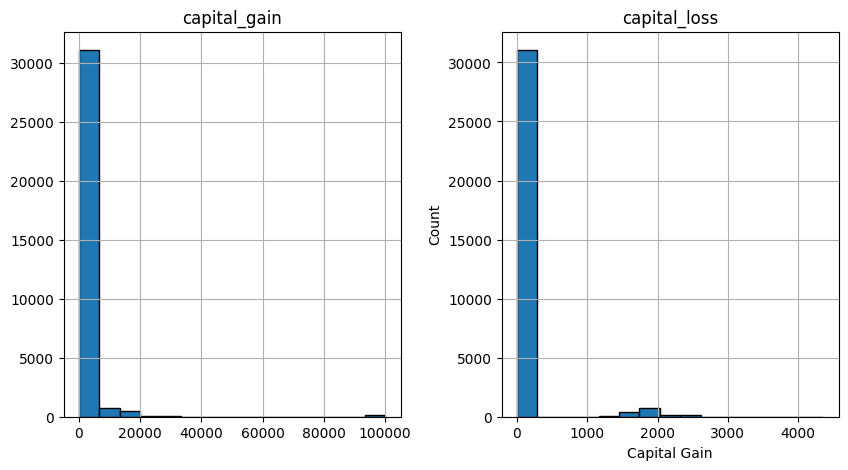

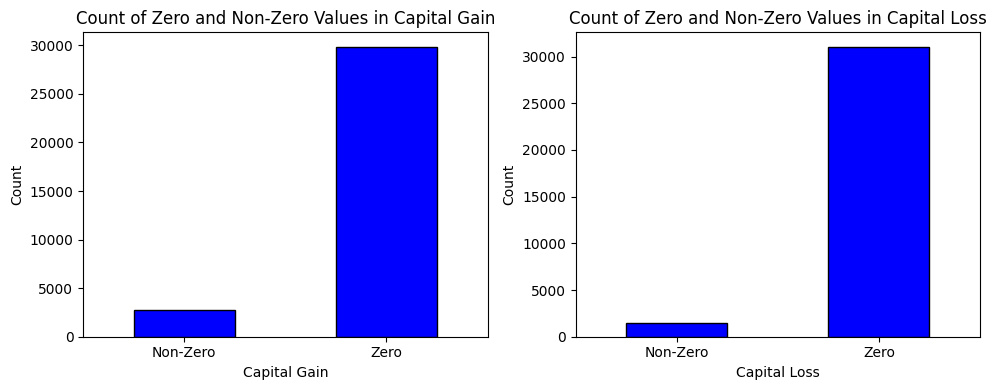

In [13]:
# Question 3
# Plot the distribution of capital_gain and capital_loss
income94[['capital_gain', 'capital_loss']].hist(figsize=(10, 5), bins=15, edgecolor="black")
plt.subplots_adjust(wspace=0.3)

# Yes, I think we change both columns to categorical variable since most of the data has zero value.
# One of the ways is to transform the column into binary data type, whether it has a capital_gain/capital_loss or not.

# Create binary columns
income94['capital_gain_zero'] = (income94['capital_gain'] == 0).astype(int)
income94['capital_loss_zero'] = (income94['capital_loss'] == 0).astype(int)

# Plot bar chart for both variables side by side
plt.figure(figsize=(10, 4))

# Capital Gain
plt.subplot(1, 2, 1)
income94['capital_gain_zero'].value_counts().sort_index().plot(kind='bar', edgecolor='black', color='blue')
plt.title('Count of Zero and Non-Zero Values in Capital Gain')
plt.xticks([0, 1], ['Non-Zero', 'Zero'], rotation=0)
plt.xlabel('Capital Gain')
plt.ylabel('Count')

# Capital Loss
plt.subplot(1, 2, 2)
income94['capital_loss_zero'].value_counts().sort_index().plot(kind='bar', edgecolor='black', color='blue')
plt.title('Count of Zero and Non-Zero Values in Capital Loss')
plt.xticks([0, 1], ['Non-Zero', 'Zero'], rotation=0)
plt.xlabel('Capital Loss')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

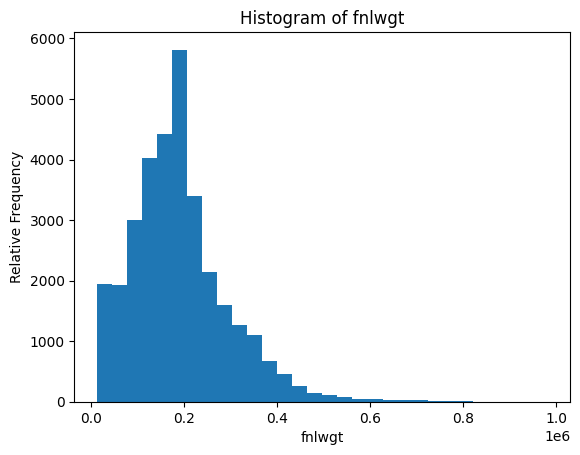

<Figure size 1200x600 with 0 Axes>

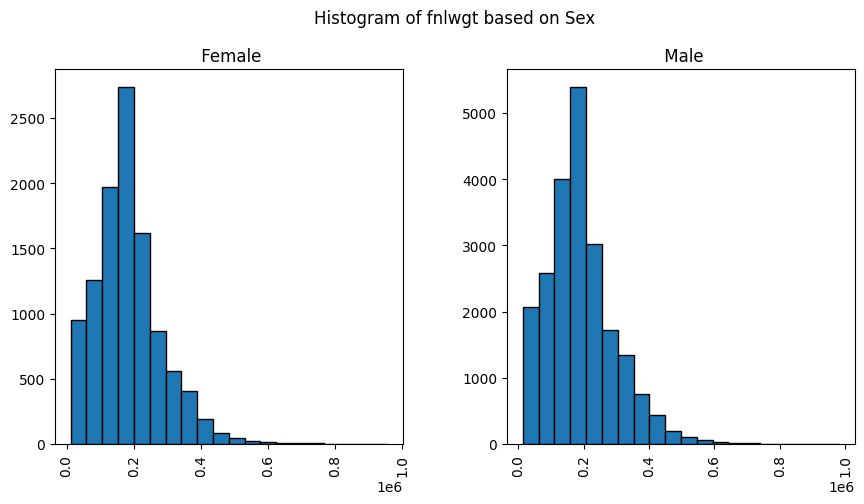

<Figure size 1200x600 with 0 Axes>

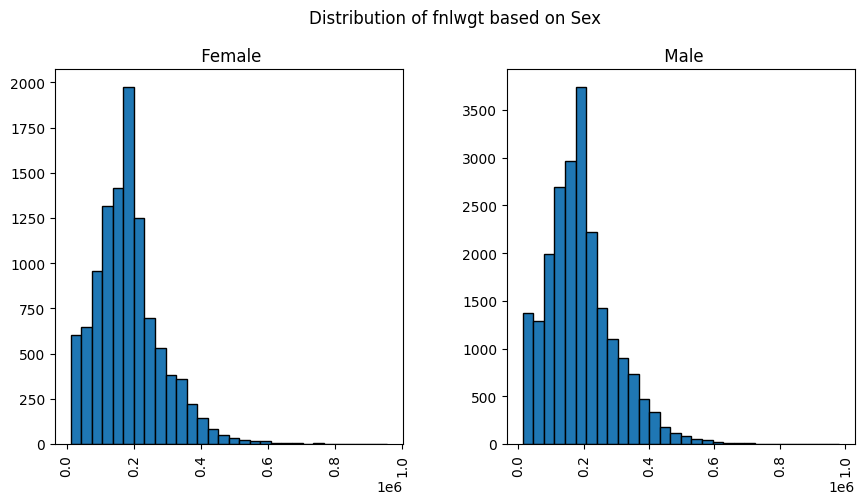

In [12]:
# Question 4
plt.hist(income94.fnlwgt, bins = 30)
plt.title('Histogram of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Relative Frequency')
plt.show()

# Plot histogram based on sex
plt.figure(figsize=(12, 6))
income94.hist(column='fnlwgt', by='sex', bins=20, edgecolor="black", figsize=(10, 5))
plt.suptitle('Histogram of fnlwgt based on Sex', y=1.02)
plt.show()

income94.describe()

# Based on the histogram, the trend of fnlwgt for both sex are similar with mean around 0.2.
# We can see that there are outliers for each gender which has value more than 1e6.
# Hence, we can set data with fnlwgt value more than 1e6 to be missing value on this dataset.

# Replace values greater than 1e6 with np.NaN
income94.loc[income94['fnlwgt'] > 1e6, 'fnlwgt'] = np.NaN

# Plot histogram based on sex
plt.figure(figsize=(12, 6))
income94.hist(column='fnlwgt', by='sex', bins=30, edgecolor="black", figsize=(10, 5))
plt.suptitle('Distribution of fnlwgt based on Sex', y=1.02)
plt.show()


Statistical Test for education_num and hours_per_week:
Correlation Coefficient: 0.1481227326229122
P-value: 4.236647478996013e-159
The correlation is statistically significant.


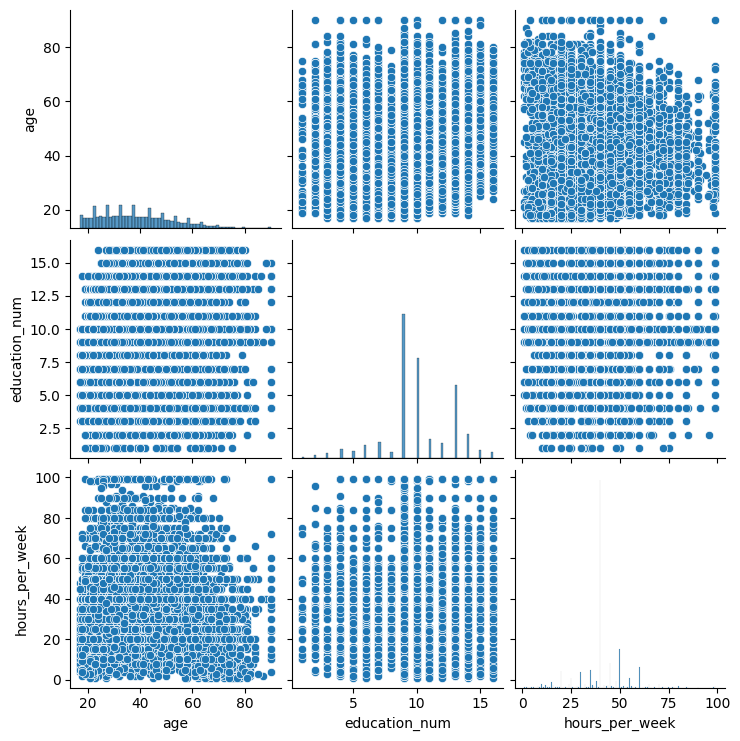

In [19]:
# Part II (Correlation)
# Question 1a
selected_columns = ['age', 'education_num', 'hours_per_week']
sns.pairplot(data=income94[selected_columns])

# From this scatterplot, we can not see any correlation between those variables because it seems that the data is quite uniform.

# Question 1b
# So, we can use Pearson Correlation test for each pair of variables to determine whether they are correlated
for i in range(len(selected_columns)):
  for j in range(i + 1, len(selected_columns)):
    correlation_coefficient, p_value = stats.pearsonr(income94[selected_columns[i]], income94[selected_columns[j]])
    if (abs(correlation_coefficient) > 0.1):
      print(f"\nStatistical Test for {selected_columns[i]} and {selected_columns[j]}:")
      print(f"Correlation Coefficient: {correlation_coefficient}")
      print(f"P-value: {p_value}")

      # Check for signifiance using hypothesis testing
      alpha = 0.05 # significance level
      if p_value < alpha:
        print("The correlation is statistically significant.")
      else:
        print("The correlation is not statistically significant.")

# From this statistical test, there is a positive relationship between "education_num" and "hours_per_week".
# As for the significance of the finding, the extremely small p-value (4.2366e-159) suggests that this correlation is statistically significant.
# This means that the observed correlation is unlikely to be a result of random chance, and
# we have enough evidence to reject the null hypothesis that the true correlation is zero.
# The result is expected because the coefficient is close enough to 0 but it still have a positive relationship as shown in the scatterplot.

In [29]:
# Question 1c
income94_male = income94[income94['sex'] == ' Male']
income94_female = income94[income94['sex'] == ' Female']

correlation_coefficient_male, p_value_male = stats.pearsonr(income94_male['education_num'], income94_male['age'])
correlation_coefficient_female, p_value_female = stats.pearsonr(income94_female['education_num'], income94_female['age'])

print(f"\nStatistical Test for Male between education_num and age:")
print(f"Correlation Coefficient: {correlation_coefficient_male}")
print(f"P-value: {p_value_male}")

print(f"\nStatistical Test for Female between education_num and age:")
print(f"Correlation Coefficient: {correlation_coefficient_female}")
print(f"P-value: {p_value_female}")

# The correlation coefficient for male participants is positive (0.0605), indicating a weak positive correlation between 'education_num' and 'age'.
# For female participants, the correlation coefficient is negative (-0.0179), indicating a weak negative correlation.

# The p-value for male participants is extremely small, suggesting a highly significant correlation.
# On the other hand, the p-value for female participants is 0.0632, which is greater than the typical significance level of 0.05.

# The correlation between 'education_num' and 'age' is statistically significant for male participants.
# For female participants, the correlation is not statistically significant at a typical significance level of 0.05.

# I think the result is quite expected. The older female participants may have faced different societal expectations or limitations regarding education,
# leading to a less uniform relationship between education and age.


Statistical Test for Male between education_num and age:
Correlation Coefficient: 0.060486409198268254
P-value: 4.0229868301397012e-19

Statistical Test for Female between education_num and age:
Correlation Coefficient: -0.017899243935447704
P-value: 0.06322895030880732


In [30]:
# Question 1d
income94[['education_num', 'hours_per_week']].cov()

# Since there is a positive covariance (4.71) between 'education_num' and 'hours_per_week',
# it suggests that higher education tends to be associated with more hours worked per week and vice versa.

,education_num,hours_per_week
education_num,6.618890,4.705338
hours_per_week,4.705338,152.458995


In [36]:
# Part 2 (Regression)
# Question 1

# Fit a linear regression with hours_per_week as the dependent variable and sex as the independent variable
reg1 = smf.ols('hours_per_week ~ sex', data = income94).fit()
print(reg1.summary())

# Based on this model, when 'sex' is 0 (female), the predicted average hours per week is approximately 36.41 (intercept).
# On average, 'Male' individuals work approximately 6.02 more hours per week than 'Female' individuals.

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:44:47   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.4104      0.116    314.412   

In [37]:
# Add education_num as a control variable
reg2 = smf.ols('hours_per_week ~ sex + education_num', data = income94).fit()
print(reg2.summary())

# Interpretation of the linear regression
# 1. Intercept: When 'sex' is 'Female' and 'education_num' is 0, the predicted average hours per week is approximately 29.41.
# 2. Coefficient for 'sex[T. Male]: On average, 'Male' individuals work approximately 5.97 more hours per week than 'Female' individuals,
#    holding 'education_num' constant.
# 3. Coefficient for 'education_num': On average, for each additional year of education, individuals work approximately 0.70 more hours per week,
#    holding 'sex' constant
# 4. P-values: All coefficients have p-values less than 0.05, indicating that they are statistically significant.

# Solution:
# The trend in hours worked by men vs. women remains the same when controlling for 'education_num'.
# The coefficient for 'education_num' is statistically significant, suggesting that the number of years of education has a
# significant association with hours worked per week, independent of gender.

# 95% Confidence Interval for Coefficients:
# For 'Intercept': [28.859, 29.962]
# For 'sex[T. Male]': [5.697, 6.245]
# For 'education_num': [0.647, 0.748]

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:10:42   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4106      0.281    104.556

In [38]:
# Question 4
# Add gross_income_group as a binary variable
reg3 = smf.ols('hours_per_week ~ sex + education_num + gross_income_group', data = income94).fit()
print(reg3.summary())

# Interpretation
# 1. Intercept: When 'sex' is 'Female', 'gross_income_group' is '<=50K', and 'education_num' is 0, the predicted average hours per week is approximately 31.42.
# 2. Coefficient for 'sex[T. Male]: On average, 'Male' individuals work approximately 5.10 more hours per week than 'Female' individuals,
#    holding 'gross_income_group' and 'education_num' constant.
# 3. Coefficient for 'gross_income_group[T. >50K]: On average, individuals with gross income greater than 50K work approximately 4.52 more hours
#    per week than those with gross income less than or equal to 50K, holding 'sex' and 'education_num' constant.
# 4. Coefficient for 'education_num': On average, for each additional year of education, individuals work approximately 0.45 more hours per week,
#    holding 'sex' and 'gross_income_group' constant.
# 5. P-values: All coefficients have p-values less than 0.05, indicating that they are statistically significant.

# In order to decide which model is the "best", we can use the R-squared from each model because it a measure of how well
# the independent variables in a regression model explain the variability in the dependent variable.
# Based on this statistic, this last model is the best because it has the greatest value of R-squared which is 0.094.

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:24:34   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         